# 문제 1
- 수 묶기
- https://www.acmicpc.net/problem/1744

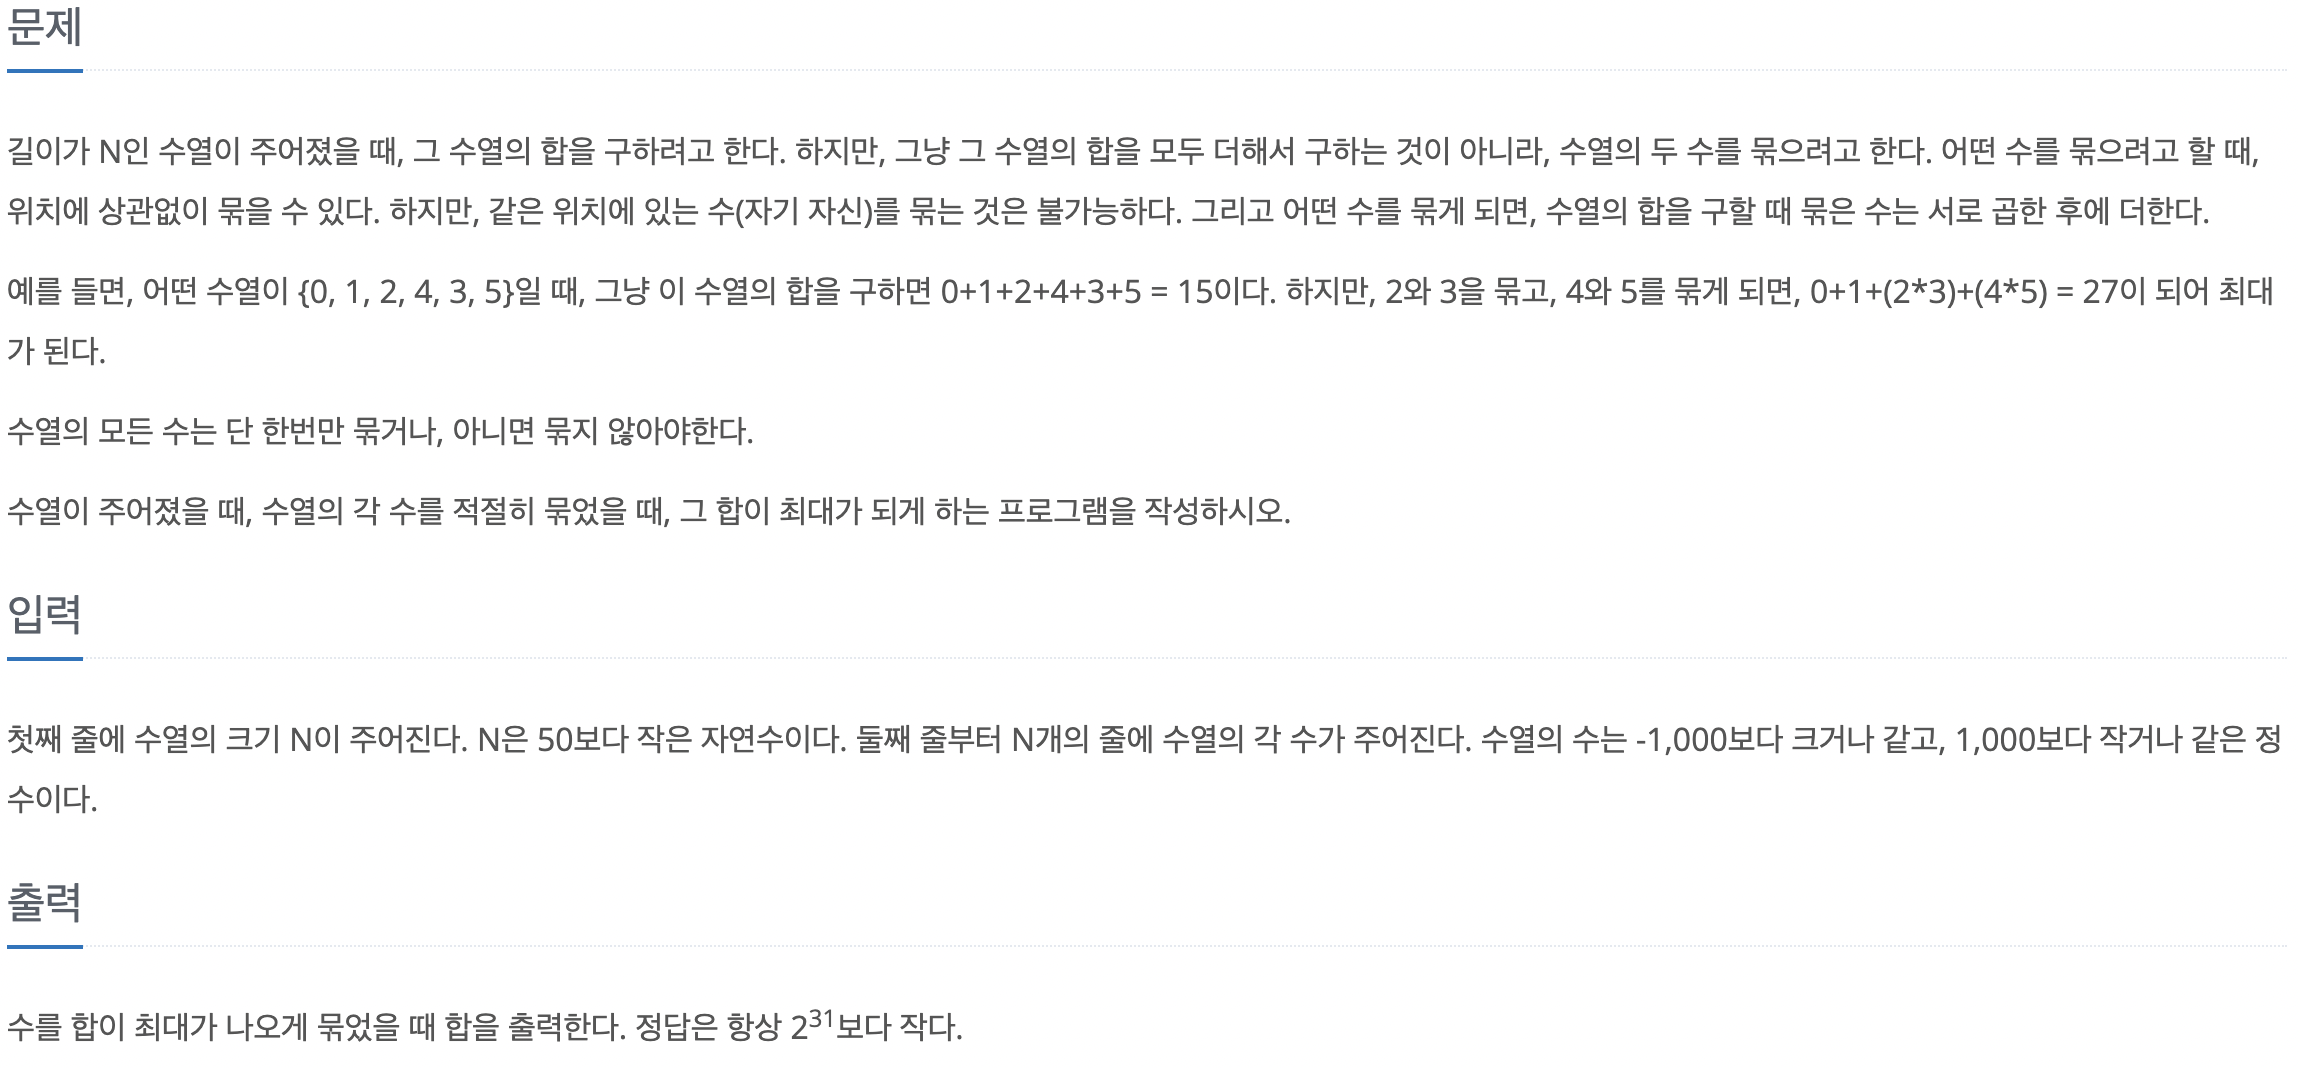

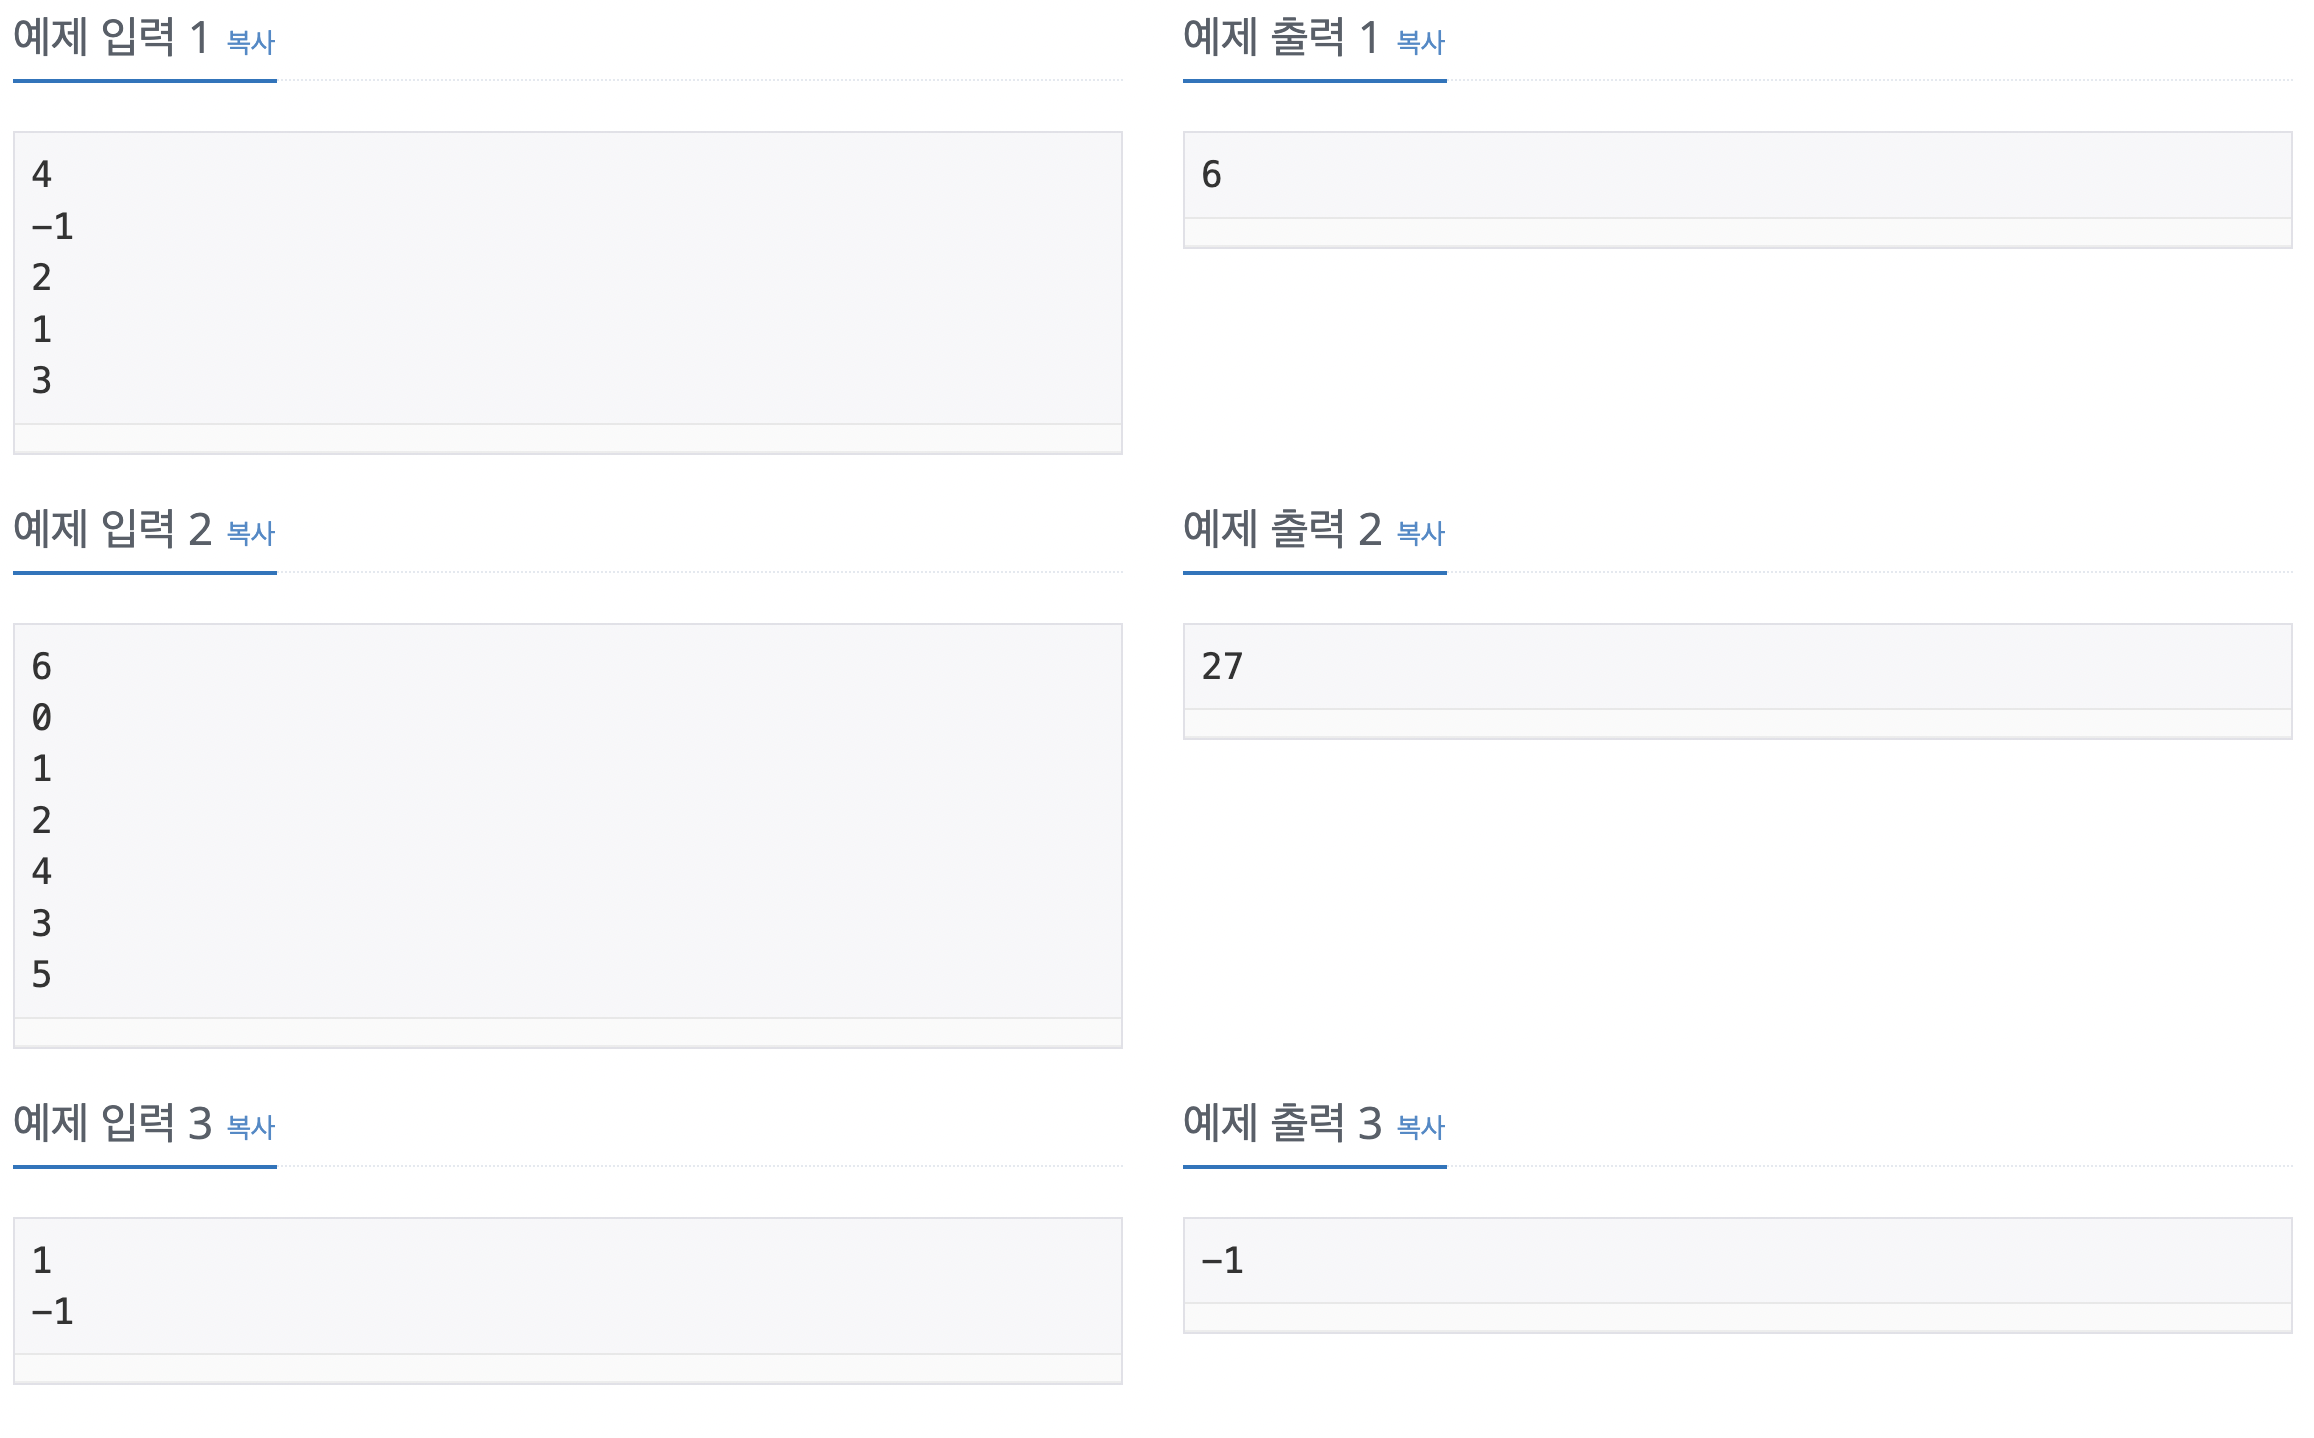

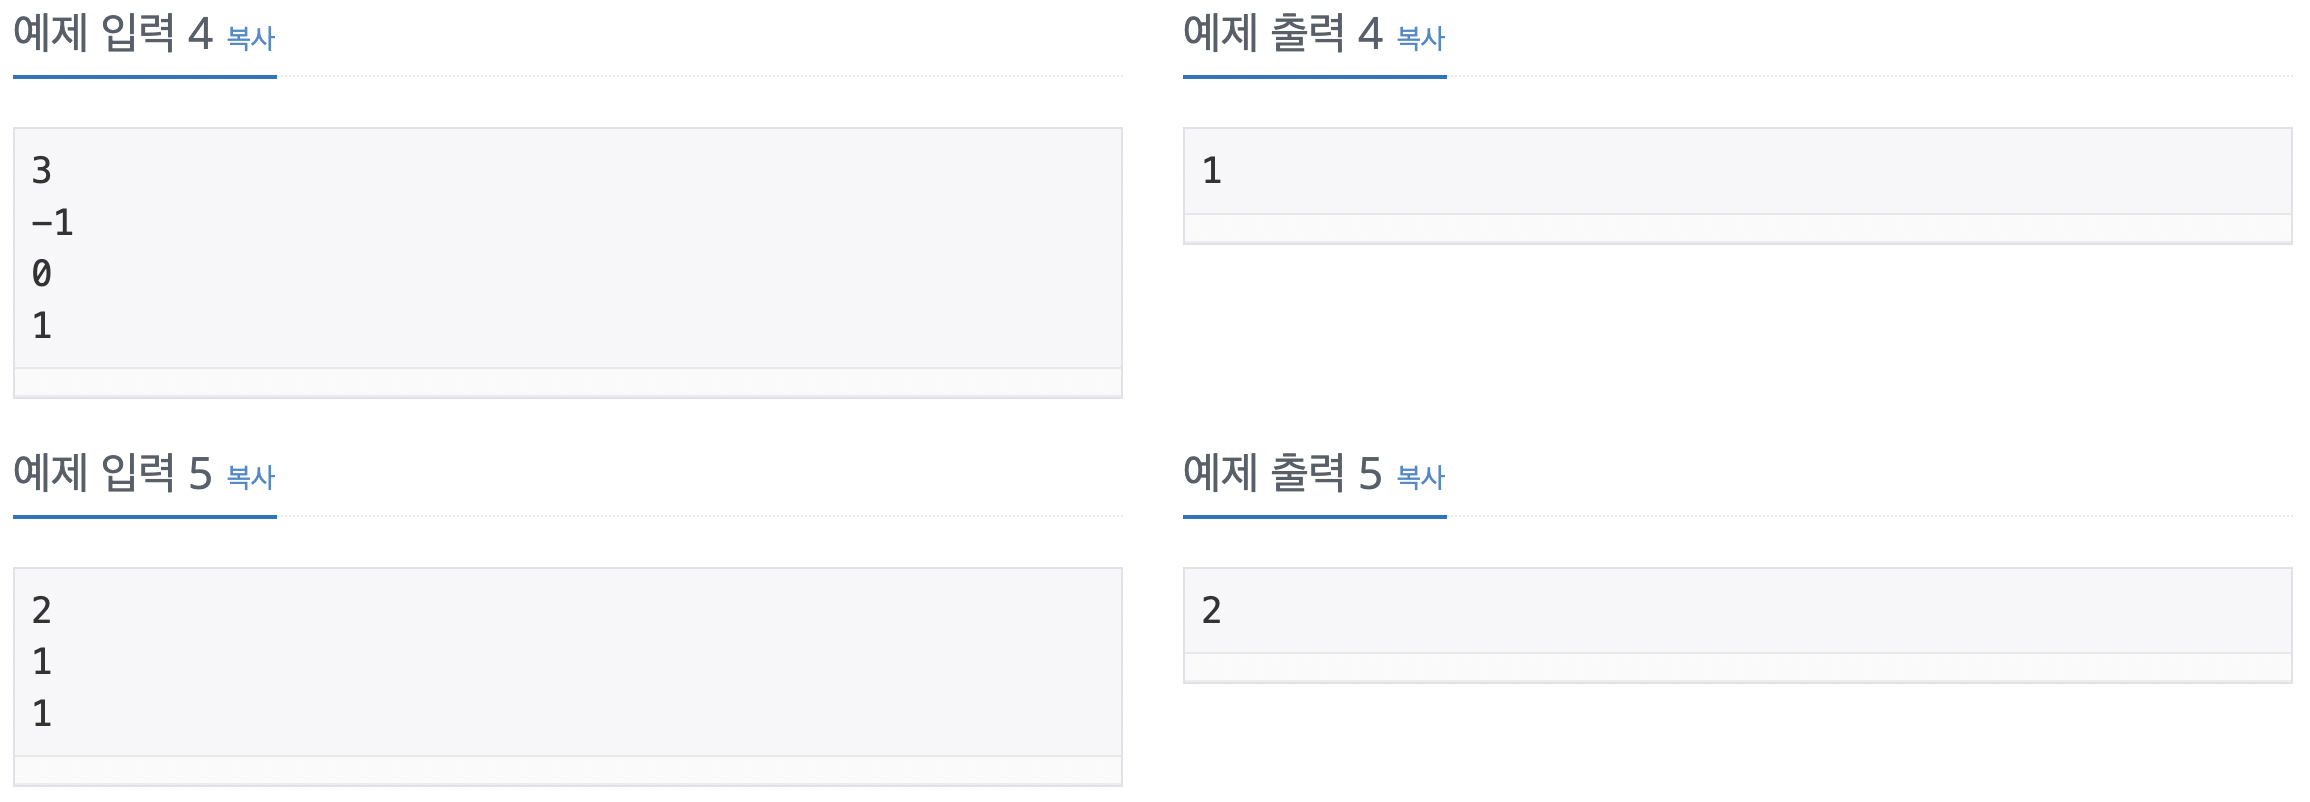

## Step
- 가장 큰 음수는 0과 묶고, 0이 없다면 묶지 않는다.
- 가장 큰 양수는 그 다음으로 큰 양수와 묶는다.


### 1차 풀이 후, 오답처리 받았다
- 음수만 주어진 경우, 음수 * 음수는 양수로 처리해야하는데 그냥 음수끼리의 합으로 더해줬기 때문인듯
- ex) [-4,-3,-2,-1] 이 주어지면, 올바른 답은 14, 내 풀이로 풀면 -10

### 여러번의 value error, index error 끝에 제출 결과, 오답처리
- 반례가 무엇일까?
- !!!! 1만 입력되었을 때, 1과 1을 곱해버려서 손해를 보는 경우가 생겼다

### 입력을 받을 때 부터, 양수, 음수, 0으로 세 개의 리스트에 받을까?
- 그러면 확실히 오류를 줄일 수도 있을 것 같으면서도 반례에 강할 것 같다.
- 이런식으로 해결 완료

### 실패코드
---

In [233]:
N = int(input())
num_list = []
for _ in range(N):
    num_list.append(int(input()))

num_list.sort()

ans_list = []

# 양수들을 큰 순서대로 곱해서 더해주는 방식
while num_list and max(num_list) > 0 :
    tmp = num_list.pop()
    if tmp == 1:
        ans_list.append(tmp)
        break
    
    if max(num_list) > 0 and max(num_list) != 1:
        tmp2 = num_list.pop()
        ans_list.append(tmp*tmp2)
    else:
        ans_list.append(tmp)        

# 0이 몇 개 있는지 세어주기
zero_cnt = 0
for num in num_list:
    if num == 0:
        zero_cnt += 1
        
# 음수끼리만 남아있을 때, 절대값이 큰 음수끼리 곱해서 더해주는 방식 (음수 곱하기 음수는 양수이니까)
while max(num_list) <= 0:
    if len(num_list) == zero_cnt:
        break

    num_list.sort(reverse = True)
    tmp = num_list.pop()
    if len(num_list) != zero_cnt:
        tmp2 = num_list.pop()
        ans_list.append(tmp*tmp2)
    else:
        num_list.append(tmp)
        break
    
num_list.sort()
# 음수와 0이 공존할 때, 음수와 0을 곱해 없애주는 방식
while num_list and min(num_list) < 0:
    if 0 in num_list:
        num_list.pop(0)
        num_list.remove(0)
    else:
        break
        
ans = sum(num_list) + sum(ans_list)
print(ans)

3
1
1
1
3


---

### 성공 코드

In [260]:
N = int(input())
plus = []
zero = []
minus = []
for _ in range(N):
    i = int(input())
    if i == 0:
        zero.append(i)
    elif i > 0:
        plus.append(i)
    else:
        minus.append(i)
        
plus.sort()
minus.sort(reverse = True)

ans_list = []

# 양수들을 큰 순서대로 곱해서 더해주는 방식
while plus:
    if max(plus) == 1: # 모든 원소가 1이면, 작업하지 않음
        #ans_list.append(sum(plus))
        break
        
    tmp = plus.pop()
    
    if plus:
        tmp2 = plus.pop()
        if tmp2 == 1:
            ans_list.append(tmp)
            plus.append(tmp2)
        else:
            ans_list.append(tmp*tmp2)
    else:
        ans_list.append(tmp)        
# print('양수 작업 끝났을 때')
# print('plus :', plus)
# print('ans_list :', ans_list)
# print('--------------------')

# 음수끼리만 남아있을 때, 절대값이 큰 음수끼리 곱해서 더해주는 방식 (음수 곱하기 음수는 양수이니까)
while minus:    
    minus.sort(reverse = True)
    tmp = minus.pop()
    if minus:
        tmp2 = minus.pop()
        ans_list.append(tmp*tmp2)
    else:
        minus.append(tmp)
        break
# print('음수 작업 끝났을 때')
# print('minus :', minus)
# print('ans_list :', ans_list)
# print('--------------------')

# 음수와 0이 공존할 때, 음수와 0을 곱해 없애주는 방식
while minus and zero:
    minus.pop()
    zero.pop()  
    
# print('0과 잔여 음수 곱하기 작업 끝났을 때')
# print('plus :', plus)
# print('minus :', minus)
# print('ans_list :', ans_list)
# print('--------------------')

ans = sum(plus) + sum(minus) + sum(ans_list)
print(ans)

양수 작업 끝났을 때
plus : [1, 1, 1]
ans_list : []
--------------------
음수 작업 끝났을 때
minus : []
ans_list : []
--------------------
0과 잔여 음수 곱하기 작업 끝났을 때
plus : [1, 1, 1]
minus : []
ans_list : []
--------------------
3


# 문제 2
- 행복 유치원
- https://www.acmicpc.net/problem/13164

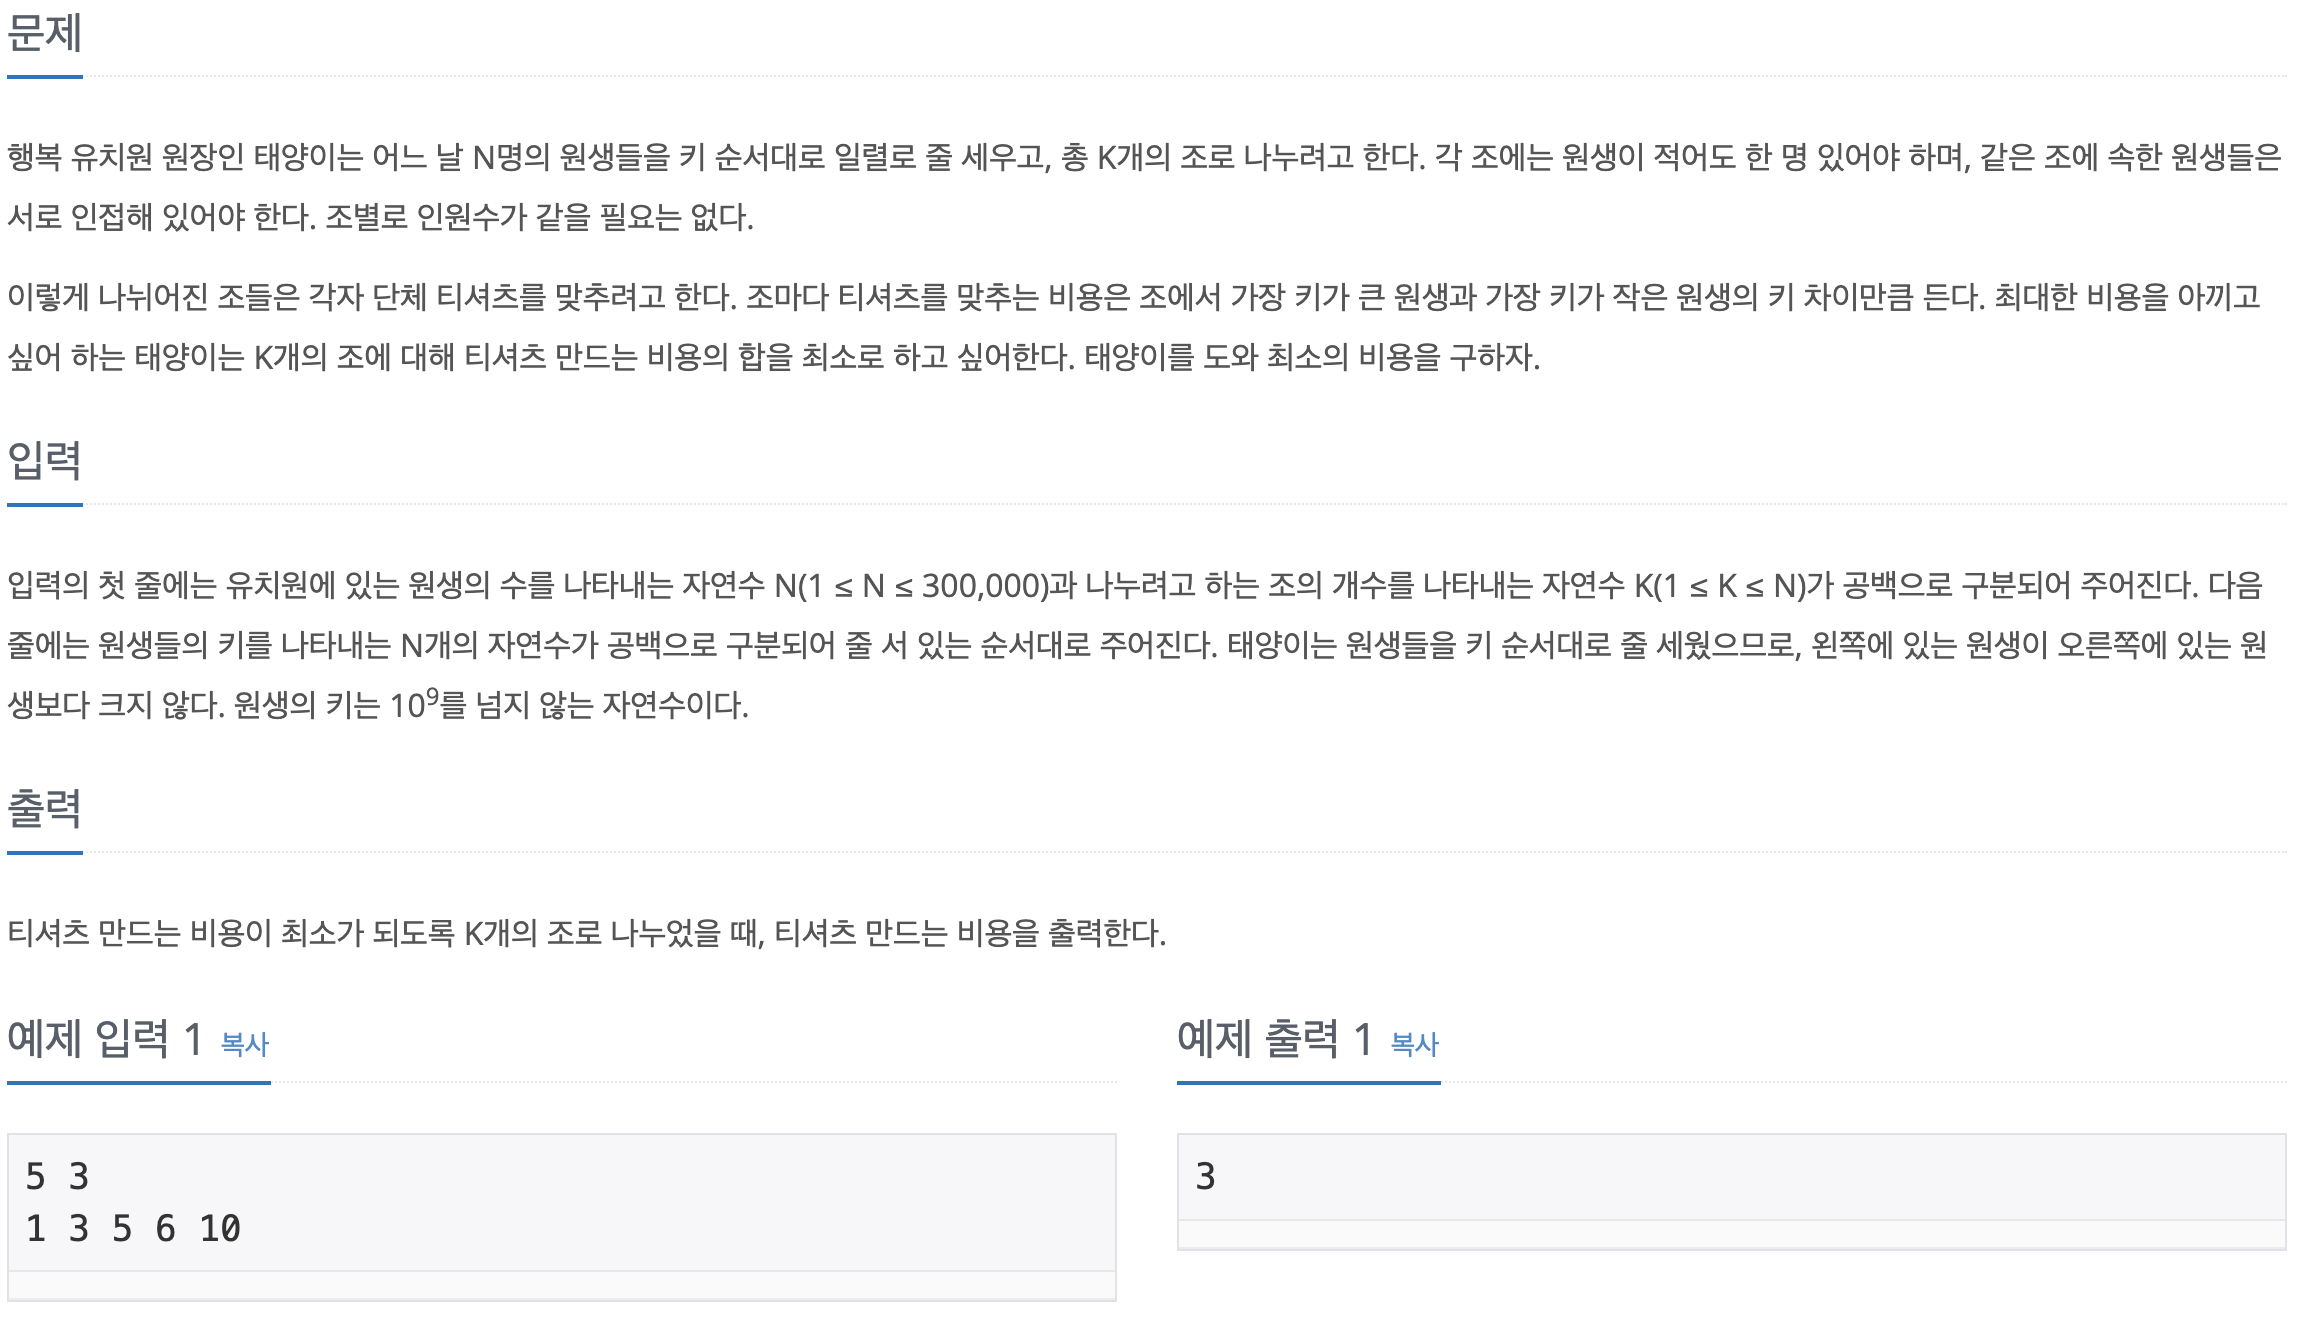

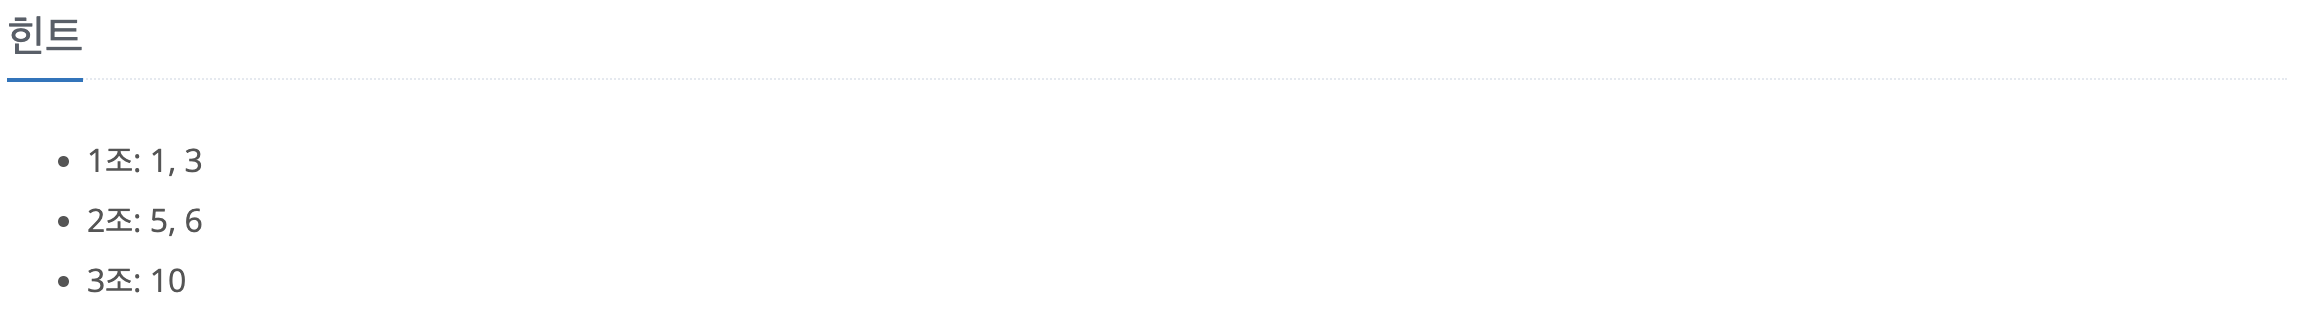

## Step
- 바로 다음 사람과 키차이가 많이 나면, 같은 조로 묶이면 안된다 (가급적이면)
- 키 차이 리스트를 새로 만든다
- 키 차이가 큰 순서대로 연결을 끊어준다(1번 끊을때마다 조가 1개씩 늘어난다)

### 한 번에 성공했지만, 사실 반례가 있을것이라고 생각했었다
```
두 칸 이상 차이 나는 사람과의 차이를 어떻게 다루지 생각했지만, 1 3 4 의 경우 4 - 1 = 4 - 3 + 3 - 1 임을 생각해 풀이 진행
```

In [21]:
N, K = map(int,input().split())
t = list(map(int, input().split()))
d = []
for i in range(N-1):
    d.append(t[i+1] - t[i])

d.sort()

for _ in range(K-1):
    d.pop()
    
print(sum(d))

3


# 문제 3
- 신입 사원
- https://www.acmicpc.net/problem/1946

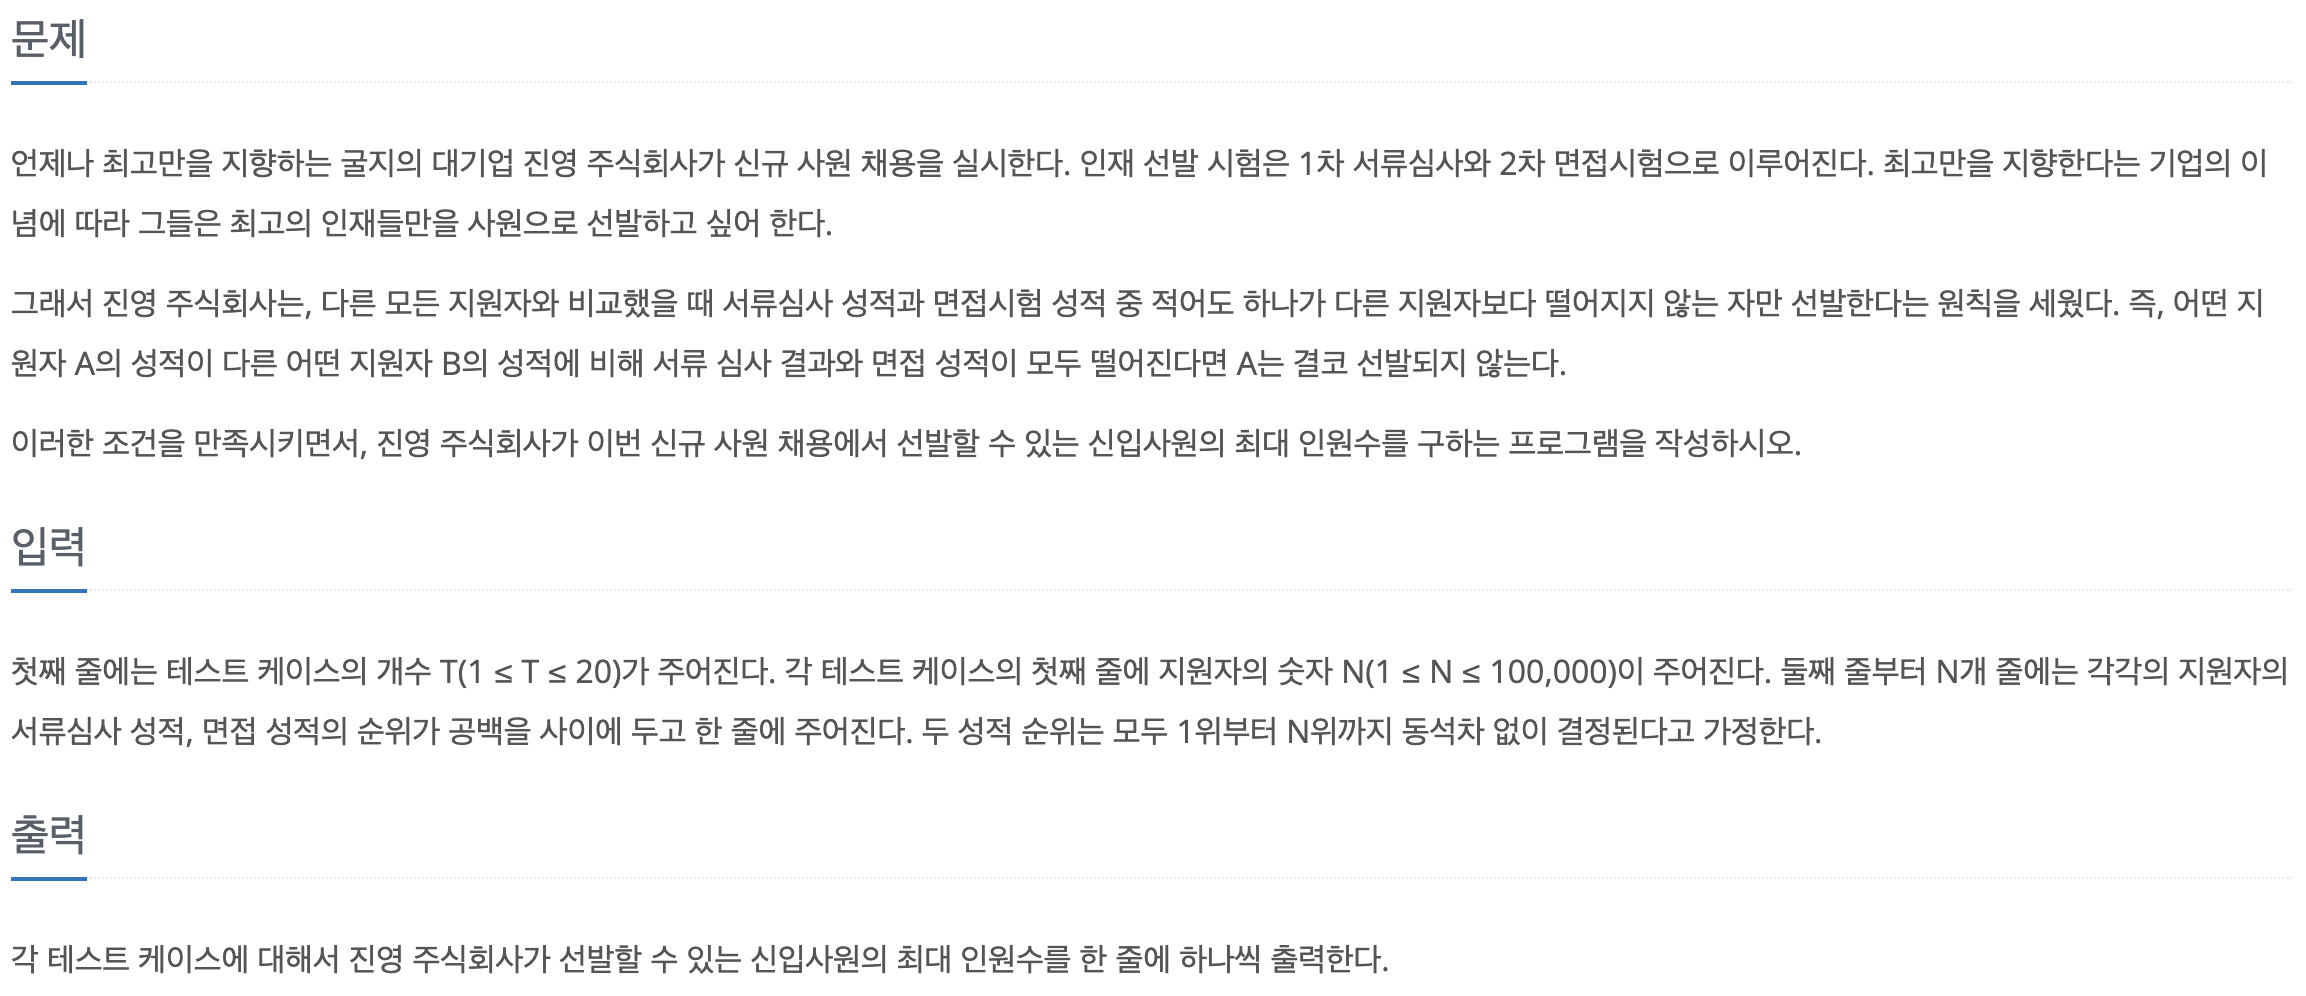


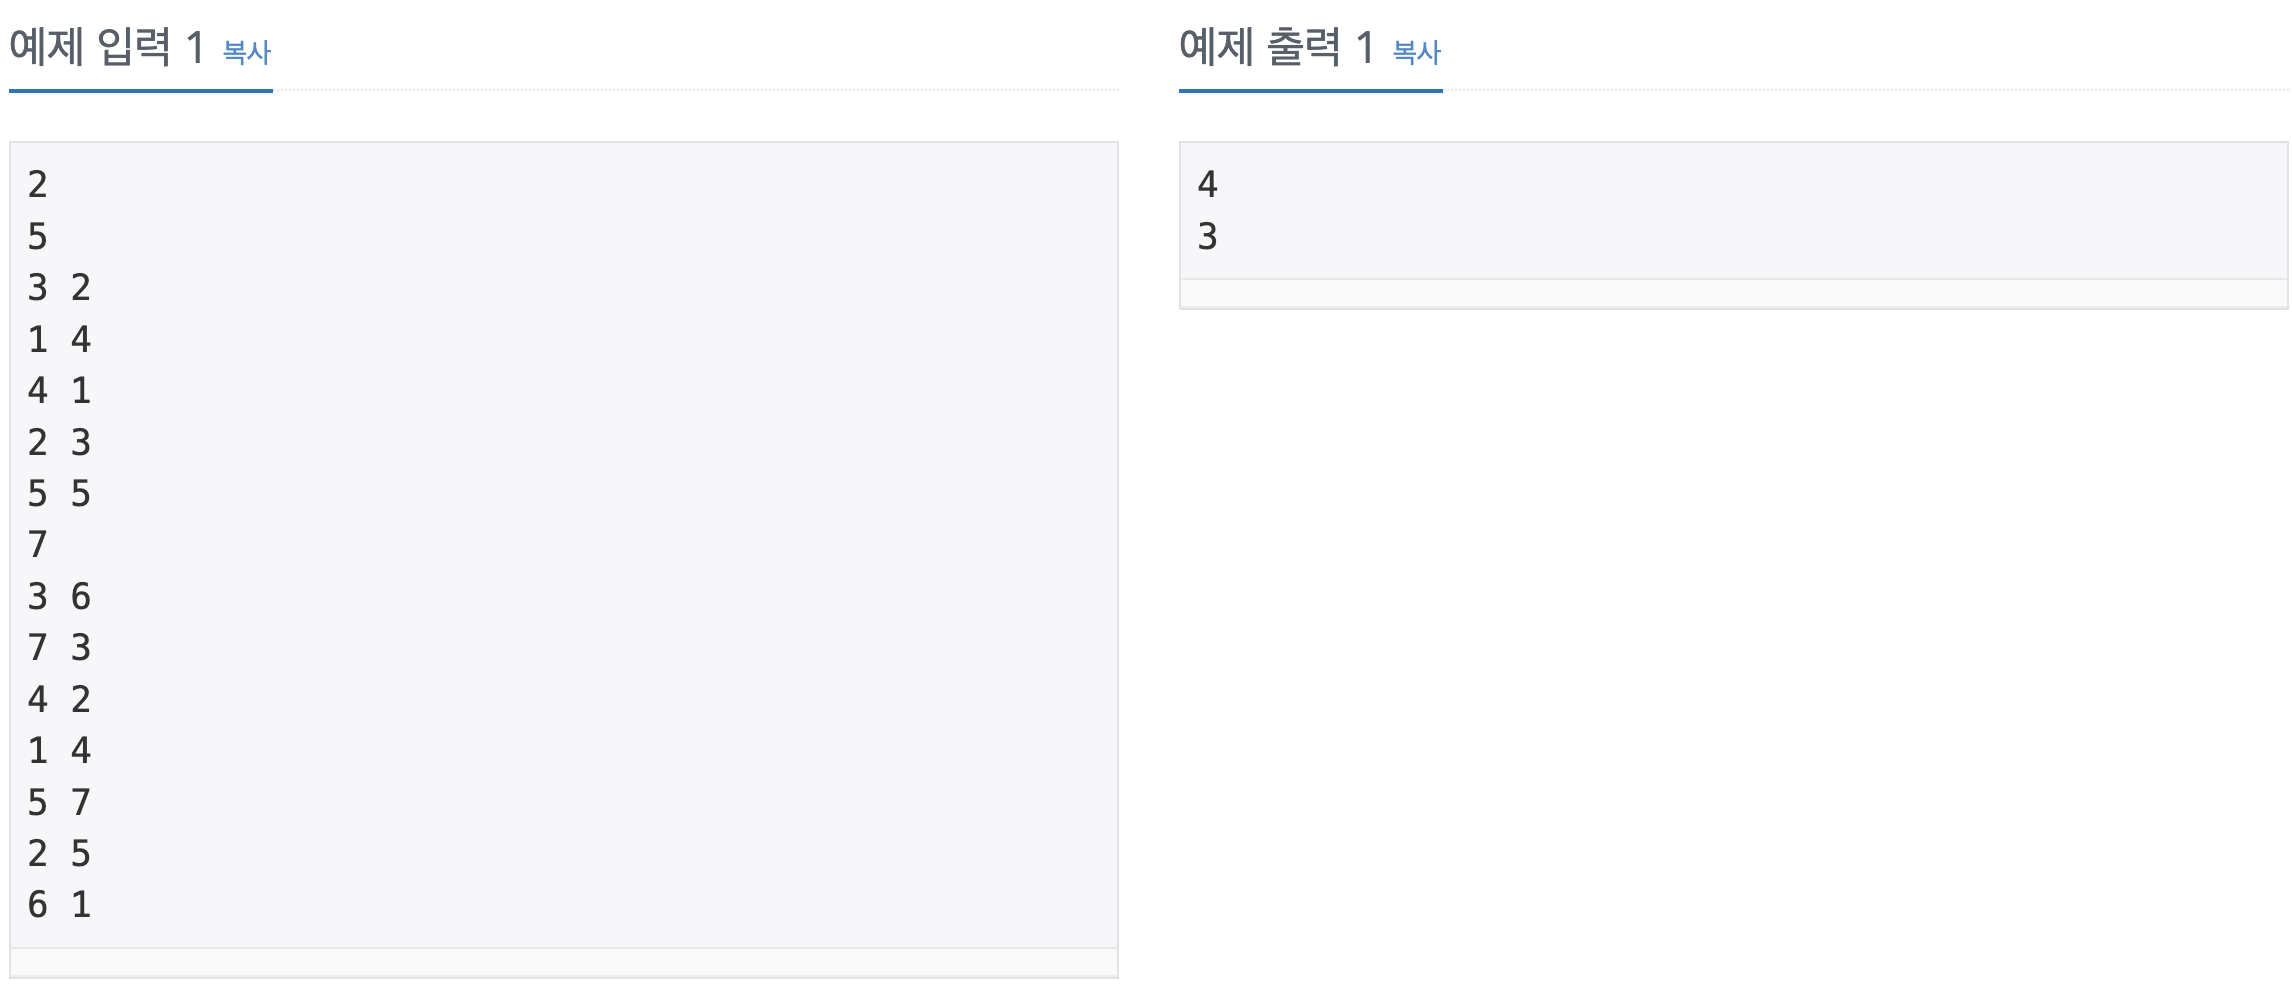

## Step
- 체크할 참가자보다 서류, 면접 순위 둘 다 앞선 참가자가 있으면, 전체 면접자수에서 하나씩 빼기
- 서류 순위 기준으로 오름차순 정렬을하면, 면접 순위만 비교를 하면 된다


### 1차 제출시, 시간초과
- 해결방안
    - input -> sys 이용하기
    - 면접순위를 담은 tmp를 생성하지 않고, min값을 갱신해주며 새로 들어온 참가자(앞선 참가자들 보다 서류가 밀리는)의 면접 순위가 이전에 나왔던 최소 순위보다 작지 않다면, 이 사람은 뽑을 수 없으므로 탈락을 시키는 개념

In [18]:
import sys
sys.stdin.readline
T = int(sys.stdin.readline().strip())
for _ in range(T):
    N = int(input())
    total = [[int(x) for x in sys.stdin.readline().split()] for _ in range(N)]
    total = sorted(total, key = lambda x : x[0])
        
    min_rank = N+1
    cnt = N
    for each in total:
        if each[1] < min_rank:
            min_rank = each[1]
        else:
            cnt -= 1
    print(cnt)

5
3 2
1 4
4 1
2 3
5 5
4
7
3 6
7 3
4 2
1 4
5 7
2 5
6 1
6
5
4


### Test code
--- 

In [15]:
T = int(input())

2


In [33]:
N = int(input())
total = [[int(x) for x in sys.stdin.readline().split()] for _ in range(N)]

# total = []
# for _ in range(N):
#     a,b = map(int, input().split())
#     total.append([a,b])

5
3 2
1 4
4 1
2 3
5 


[[3, 2], [1, 4], [4, 1], [2, 3], [5]]

In [36]:
total = sorted(total, key = lambda x : x[0])

min_rank = N+1
cnt = N
for each in total:
    if each[1] < min_rank:
        min_rank = each[1]
    else:
        cnt -= 1
cnt

4

In [28]:
total

[[1, 4], [2, 3], [3, 2], [4, 1], [5, 5]]

In [31]:
cnt = N
for i in range(1,N):
    #print(tmp[:i], tmp[i])
    if min(tmp[:i]) < tmp[i]:
        cnt -= 1

print(cnt)

4
